## __Final Project:__ Hierarchical Risk Contribution Part 2

In [3]:
#import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mlfinlab.portfolio_optimization.herc import HierarchicalEqualRiskContribution

In [4]:
#import historical stock prices data from 2015 - 2020

BBNI = pd.read_csv('BBNI.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
CEKA = pd.read_csv('CEKA.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
DMAS = pd.read_csv('DMAS.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
DVLA = pd.read_csv('DVLA.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
ELSA = pd.read_csv('ELSA.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
EPMT = pd.read_csv('EPMT.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
INDR = pd.read_csv('INDR.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
INDS = pd.read_csv('INDS.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
IPCC = pd.read_csv('IPCC.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
LSIP = pd.read_csv('LSIP.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
MBAP = pd.read_csv('MBAP.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
MFIN = pd.read_csv('MFIN.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
MFMI = pd.read_csv('MFMI.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
MSIN = pd.read_csv('MSIN.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
NRCA = pd.read_csv('NRCA.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
PBID = pd.read_csv('PBID.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
PGLI = pd.read_csv('PGLI.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
POWR = pd.read_csv('POWR.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
PPRE = pd.read_csv('PPRE.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
PTRO = pd.read_csv('PTRO.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
SCCO = pd.read_csv('SCCO.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
TPMA = pd.read_csv('TPMA.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
VINS = pd.read_csv('VINS.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
WSBP = pd.read_csv('WSBP.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)

l = [BBNI, CEKA, DMAS, DVLA, ELSA, EPMT, INDR, INDS, IPCC, LSIP, MBAP, MFIN, MFMI, MSIN, NRCA, PBID, PGLI, POWR, PPRE, PTRO, SCCO, TPMA, VINS, WSBP]
stock_prices = pd.concat(l,keys= ['BBNI', 'CEKA', 'DMAS', 'DVLA', 
                                 'ELSA', 'EPMT', 'INDR', 'INDS',
                                 'IPCC', 'LSIP', 'MBAP', 'MFIN',
                                 'MFMI', 'MSIN', 'NRCA', 'PBID',
                                 'PGLI', 'POWR', 'PPRE', 'PTRO',
                                 'SCCO', 'TPMA', 'VINS', 'WSBP'],axis=0).reset_index()
stock_prices = stock_prices.drop(['Open', 'High', 'Low', 'Close','Volume'], axis=1)
stock_prices['Date'] = pd.to_datetime(stock_prices['Date'])
stock_prices = stock_prices.set_index('Date', drop=True)
stock_prices = stock_prices.sort_index()
stock_prices = stock_prices.pivot_table('Adj Close', ['Date'], 'level_0')
stock_prices = stock_prices.dropna(axis=0)
# stock_prices = stock_prices.resample('D').sum()


stock_prices.head(10)

level_0,BBNI,CEKA,DMAS,DVLA,ELSA,EPMT,INDR,INDS,IPCC,LSIP,...,NRCA,PBID,PGLI,POWR,PPRE,PTRO,SCCO,TPMA,VINS,WSBP
Date,,,,,,,,,,,,,,,,,,,,,
2018-08-08,7678.178223,888.511353,85.289276,1775.092163,360.073669,1747.283813,6426.545410,1945.394043,1460.791260,1278.141602,...,306.528564,977.284973,194.372086,899.169373,380.589966,1584.561279,9057.666992,261.107880,110.869713,371.024292
2018-08-09,7535.989258,916.569580,84.612381,1775.092163,347.081299,1563.359131,6379.636230,2027.981689,1492.646606,1243.730103,...,311.343170,973.126221,194.372086,908.251892,378.705841,1519.797241,9057.666992,257.430298,106.572433,367.439484
2018-08-10,7559.687500,963.333313,100.857964,1775.092163,354.505493,1563.359131,6285.818359,1963.746826,1492.646606,1194.570801,...,314.552887,977.284973,194.372086,894.628113,374.937653,1506.844360,9057.666992,257.430298,109.150795,372.816681
2018-08-13,7014.631836,925.922302,99.504158,1766.035645,332.232910,1563.359131,5863.636230,1881.159424,1465.342163,1160.159302,...,311.343170,964.808960,194.372086,908.251892,367.401215,1429.127441,9103.182617,246.397583,108.291344,354.892792
2018-08-14,6919.839355,944.627808,90.704475,1766.035645,324.808716,1471.396851,5722.909180,1862.806641,1456.240601,1160.159302,...,304.923737,968.967590,194.372086,908.251892,367.401215,1411.857056,9103.182617,229.848495,108.291344,344.138458
2018-08-15,6990.933594,939.951477,93.412071,1766.035645,328.520813,1471.396851,5769.818359,1963.746826,1428.936035,1302.721191,...,304.923737,973.126221,194.372086,894.628113,365.517090,1424.809937,8648.023438,239.042435,103.134605,344.138458
2018-08-16,6706.556641,963.333313,90.704475,1761.507446,321.096619,1471.396851,5722.909180,1963.746826,1383.428467,1297.805298,...,312.948029,973.126221,194.372086,881.004333,361.748871,1394.586548,8966.635742,237.203644,103.994064,342.346069
2018-08-17,6706.556641,963.333313,90.704475,1761.507446,321.096619,1471.396851,5722.909180,1963.746826,1383.428467,1297.805298,...,312.948029,973.126221,194.372086,881.004333,361.748871,1394.586548,8966.635742,237.203644,103.994064,342.346069
2018-08-20,6896.141113,958.656982,91.381371,1747.922607,324.808716,1471.396851,5699.454590,1927.041382,1374.327026,1307.637207,...,317.762604,973.126221,194.372086,881.004333,367.401215,1459.350708,9012.151367,233.526062,97.977882,353.100403


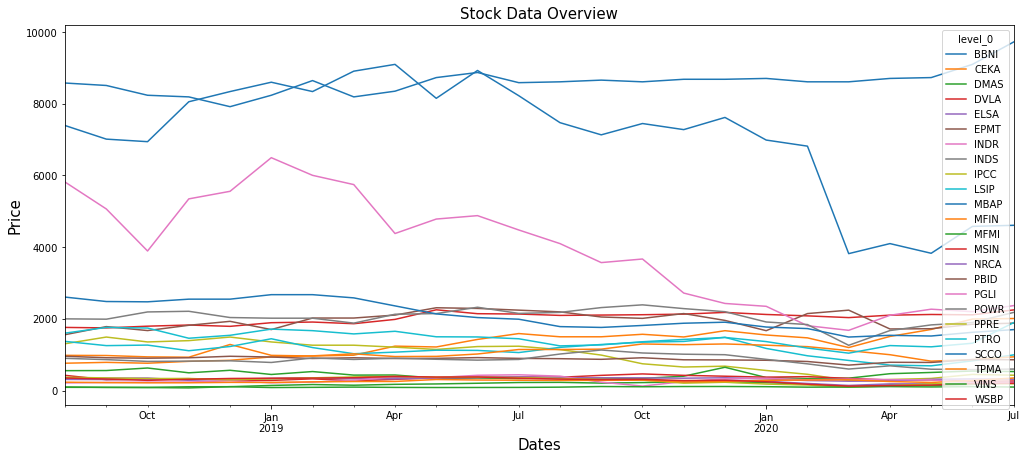

In [5]:
# taking a quick look at our most recent 5000 data points
stock_prices.resample('M').last().plot(figsize=(17,7))
plt.ylabel('Price', size=15)
plt.xlabel('Dates', size=15)
plt.title('Stock Data Overview', size=15)
plt.show()

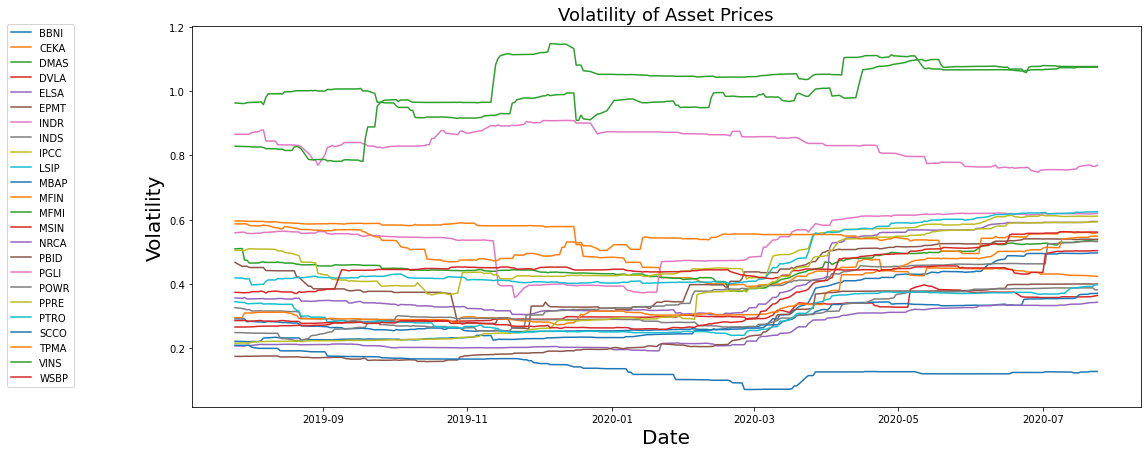

In [6]:
# plotting the volatility of our stocks
volatility = stock_prices.pct_change().rolling(window=252).std()*(252**0.5)

plt.figure(figsize=(17,7))
plt.plot(volatility)
plt.ylabel('Volatility', size=20)
plt.xlabel('Date', size=20)
plt.title('Volatility of Asset Prices', size=18)
plt.legend(stock_prices.columns, loc='upper left', bbox_to_anchor=(-0.2, 1.02))
plt.show()

In [7]:
# HERC implementation with equal_weighting solution - Single Linkage
hercEW_single = HierarchicalEqualRiskContribution()
hercEW_single.allocate(asset_names=stock_prices.columns,
                       asset_prices=stock_prices,
                       risk_measure='equal_weighting',
                       linkage='single')

print("Equal Weighting Portfolio Weights - Single Linkage \n", hercEW_single.weights)

Equal Weighting Portfolio Weights - Single Linkage 
 level_0  EPMT  TPMA   PGLI    SCCO     VINS      MFIN      MSIN      DVLA  \
0         0.5  0.25  0.125  0.0625  0.03125  0.015625  0.007812  0.003906   

level_0      INDS     MFMI  ...     NRCA     DMAS     MBAP     IPCC     PTRO  \
0        0.001953  0.00013  ...  0.00013  0.00013  0.00013  0.00013  0.00013   

level_0     LSIP     ELSA     BBNI     PPRE     WSBP  
0        0.00013  0.00013  0.00013  0.00013  0.00013  

[1 rows x 24 columns]


In [8]:
print(hercEW_single.optimal_num_clusters)

10


In [9]:
# HERC implementation with equal_weighting solution - Complete Linkage
hercEW_complete = HierarchicalEqualRiskContribution()
hercEW_complete.allocate(asset_names=stock_prices.columns,
                         asset_prices=stock_prices,
                         risk_measure='equal_weighting',
                         optimal_num_clusters=10,
                         linkage='complete')

print("Equal Weighting Portfolio Weights - Complete Linkage \n", hercEW_complete.weights)

Equal Weighting Portfolio Weights - Complete Linkage 
 level_0  PGLI   VINS    CEKA    MFMI    MSIN    POWR      DMAS      NRCA  \
0        0.25  0.125  0.0625  0.0625  0.0625  0.0625  0.010417  0.010417   

level_0      IPCC      LSIP  ...      MBAP      PTRO      INDR      PBID  \
0        0.010417  0.010417  ...  0.010417  0.010417  0.010417  0.010417   

level_0    EPMT    MFIN    DVLA     SCCO      INDS      TPMA  
0        0.0625  0.0625  0.0625  0.03125  0.015625  0.015625  

[1 rows x 24 columns]


In [10]:
print(hercEW_complete.optimal_num_clusters)

10


In [11]:
# HERC implementation with equal_weighting solution - Average Linkage
hercEW_average = HierarchicalEqualRiskContribution()
hercEW_average.allocate(asset_names=stock_prices.columns,
                        asset_prices=stock_prices,
                        risk_measure='equal_weighting',
                        optimal_num_clusters=10,
                        linkage='average')

print("Equal Weighting Portfolio Weights - Average Linkage \n", hercEW_average.weights)

Equal Weighting Portfolio Weights - Average Linkage 
 level_0  EPMT  MFIN    MSIN    SCCO    DVLA     INDS      POWR      MBAP  \
0        0.25  0.25  0.0625  0.0625  0.0625  0.03125  0.002404  0.002404   

level_0      INDR      PBID  ...      LSIP      ELSA      BBNI      PPRE  \
0        0.002404  0.002404  ...  0.002404  0.002404  0.002404  0.002404   

level_0      WSBP   TPMA    PGLI      VINS      CEKA      MFMI  
0        0.002404  0.125  0.0625  0.020833  0.020833  0.020833  

[1 rows x 24 columns]


In [12]:
print(hercEW_average.optimal_num_clusters)

10


In [13]:
# HERC implementation with equal_weighting solution - Ward Linkage
hercEW_ward = HierarchicalEqualRiskContribution()
hercEW_ward.allocate(asset_names=stock_prices.columns,
                     asset_prices=stock_prices,
                     risk_measure='equal_weighting',
                     optimal_num_clusters=10,
                     linkage='ward')

print("Equal Weighting Portfolio Weights - Ward Linkage \n", hercEW_ward.weights)

Equal Weighting Portfolio Weights - Ward Linkage 
 level_0   DVLA      POWR      INDR      PBID      ELSA      BBNI      PPRE  \
0        0.125  0.041667  0.041667  0.041667  0.020833  0.020833  0.020833   

level_0      WSBP      LSIP      PTRO  ...    INDS    TPMA    PGLI      VINS  \
0        0.020833  0.020833  0.020833  ...  0.0625  0.0625  0.0625  0.020833   

level_0      CEKA      MFMI    MSIN    SCCO    EPMT    MFIN  
0        0.020833  0.020833  0.0625  0.0625  0.0625  0.0625  

[1 rows x 24 columns]


In [14]:
print(hercEW_ward.optimal_num_clusters)

10


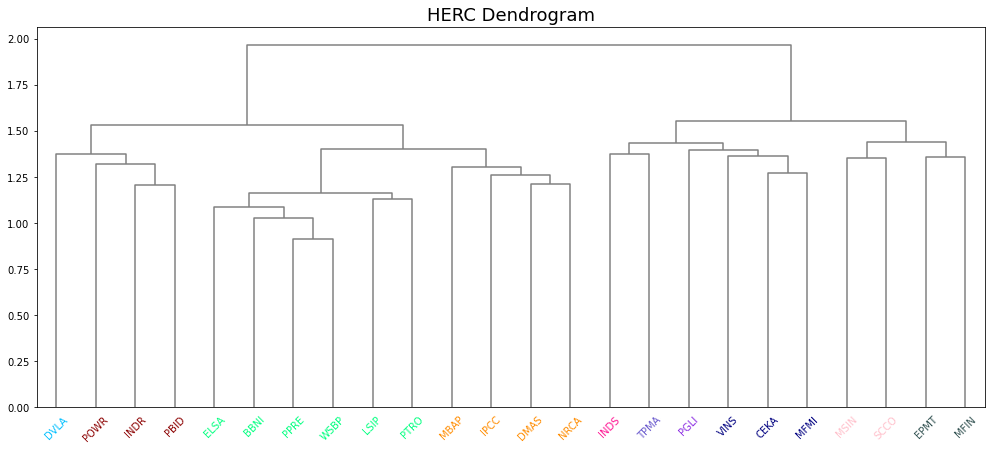

In [15]:
plt.figure(figsize=(17,7))
hercEW_ward.plot_clusters(assets=stock_prices.columns)
plt.title('HERC Dendrogram', size=18)
plt.xticks(rotation=45)
plt.show()

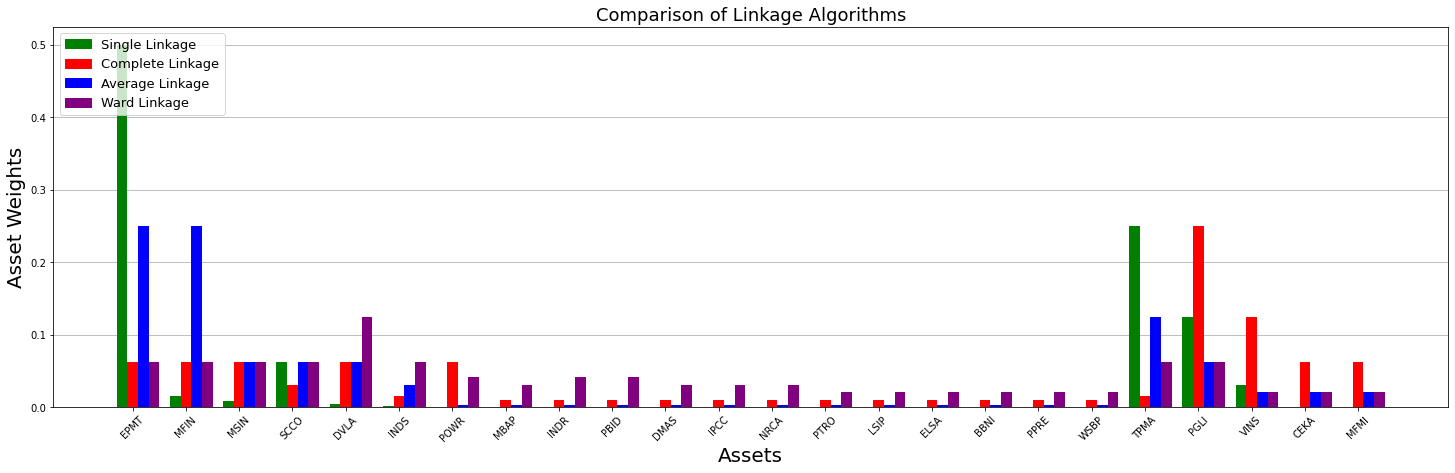

In [16]:
# comparing our four Linkage algorithms
average_linkage = hercEW_average.weights
complete_linkage = hercEW_complete.weights[average_linkage.columns]
single_linkage = hercEW_single.weights[average_linkage.columns]
ward_linkage = hercEW_ward.weights[average_linkage.columns]

x = np.arange(len(average_linkage.columns))
bar_width = 0.2

plt.figure(figsize=(25,7))
plt.bar(x, single_linkage.values[0], color='green', width=bar_width, zorder=2)
plt.bar(x + bar_width, complete_linkage.values[0], color='red', width=bar_width, zorder=2)
plt.bar(x + bar_width*2, average_linkage.values[0], color='blue', width=bar_width, zorder=2)
plt.bar(x + bar_width*3, ward_linkage.values[0], color='purple', width=bar_width, zorder=2)

plt.xticks(x + bar_width, average_linkage, rotation=45, size=10)
plt.title('Comparison of Linkage Algorithms', size=18)
plt.xlabel('Assets', size=20)
plt.ylabel('Asset Weights', size=20)

green_patch = mpatches.Patch(color='green', label='Single Linkage')
red_patch = mpatches.Patch(color='red', label='Complete Linkage')
blue_patch = mpatches.Patch(color='blue', label='Average Linkage')
purple_patch=mpatches.Patch(color='purple', label='Ward Linkage')
plt.legend(handles=[green_patch, red_patch, blue_patch, purple_patch], loc='upper left', prop={'size': 13})

plt.grid(axis='y')

plt.show()

## __Standard Deviation Portfolio__
The Standard Deviation portfolio uses the standard deviation of the clusters as a risk metric to solve for the optimal portfolio. 

In [17]:
# HERC implementation with standard_deviation solution
hercMSD = HierarchicalEqualRiskContribution()
hercMSD.allocate(asset_names=stock_prices.columns,
                 asset_prices=stock_prices,
                 optimal_num_clusters=10,
                 risk_measure='standard_deviation')

print("Standard Deviation Portfolio Weights \n", hercMSD.weights)

Standard Deviation Portfolio Weights 
 level_0      DVLA      POWR      INDR     PBID     ELSA      BBNI      PPRE  \
0        0.152672  0.083607  0.024826  0.09127  0.02064  0.029615  0.024562   

level_0      WSBP      LSIP      PTRO  ...      INDS      TPMA      PGLI  \
0        0.024827  0.017398  0.035402  ...  0.016241  0.012529  0.008212   

level_0      VINS      CEKA      MFMI     MSIN      SCCO      EPMT      MFIN  
0        0.002707  0.009485  0.002395  0.02071  0.135677  0.032564  0.042721  

[1 rows x 24 columns]


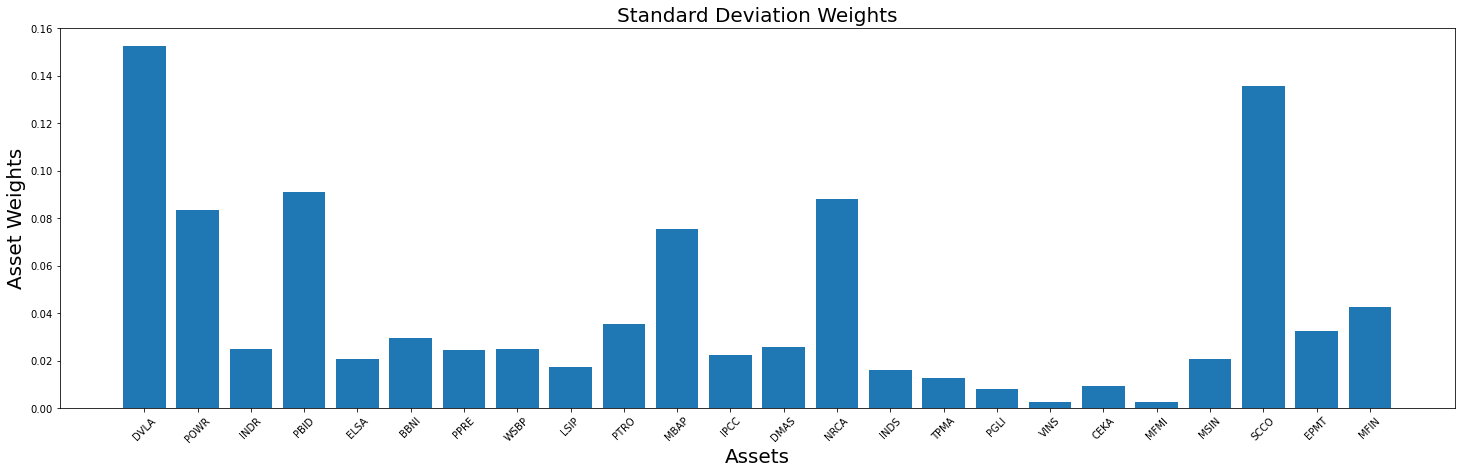

In [18]:
# plotting our optimal portfolio
hercMSD_weights = hercMSD.weights
y_pos = np.arange(len(hercMSD_weights.columns))

plt.figure(figsize=(25,7))
plt.bar(list(hercMSD_weights.columns), hercMSD_weights.values[0])
plt.xticks(y_pos, rotation=45, size=10)
plt.xlabel('Assets', size=20)
plt.ylabel('Asset Weights', size=20)
plt.title('Standard Deviation Weights', size=20)
plt.show()

## Variance Portfolio
The Variance portfolio uses the variance of the clusters as a risk metric to calculate asset weights. 

In [19]:
# HERC implementation with variance solution
hercMV = HierarchicalEqualRiskContribution()
hercMV.allocate(asset_names=stock_prices.columns,
                asset_prices=stock_prices,
                optimal_num_clusters=10,
                risk_measure='variance')

print("Variance Portfolio Weights \n", hercMV.weights)

Variance Portfolio Weights 
 level_0     DVLA      POWR      INDR     PBID      ELSA      BBNI      PPRE  \
0        0.14893  0.106682  0.031678  0.11646  0.019759  0.028351  0.023513   

level_0      WSBP      LSIP      PTRO  ...      INDS      TPMA     PGLI  \
0        0.023767  0.016655  0.033891  ...  0.006246  0.003717  0.00142   

level_0      VINS      CEKA      MFMI      MSIN      SCCO    EPMT      MFIN  
0        0.000832  0.002913  0.000736  0.016383  0.107324  0.0124  0.016268  

[1 rows x 24 columns]


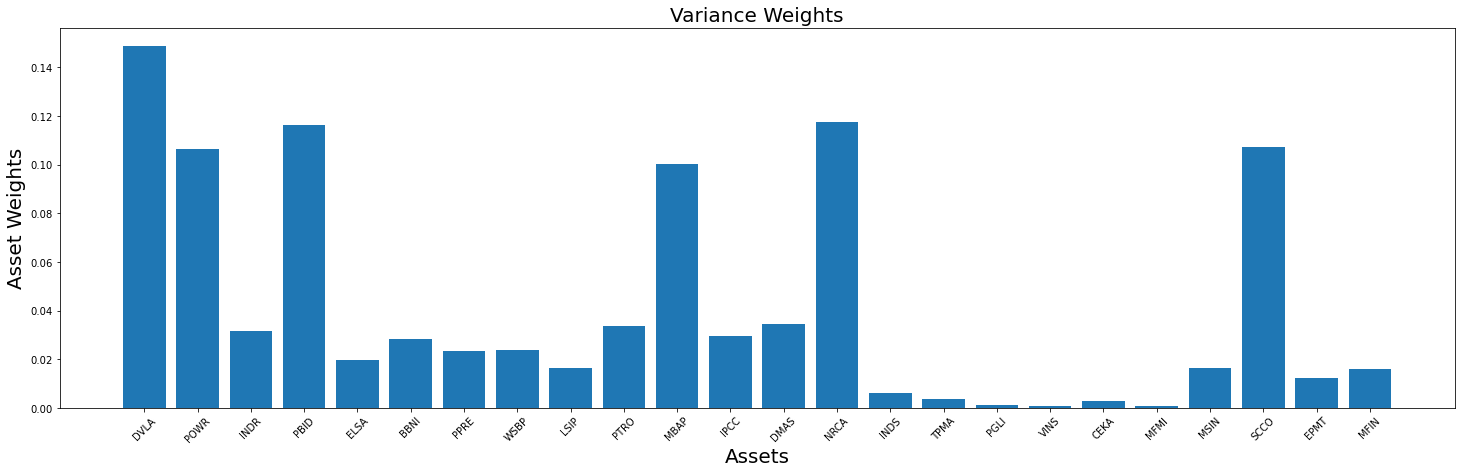

In [20]:
# plotting our optimal portfolio
hercMV_weights = hercMV.weights
y_pos = np.arange(len(hercMV_weights.columns))

plt.figure(figsize=(25,7))
plt.bar(list(hercMV_weights.columns), hercMV_weights.values[0])
plt.xticks(y_pos, rotation=45, size=10)
plt.xlabel('Assets', size=20)
plt.ylabel('Asset Weights', size=20)
plt.title('Variance Weights', size=20)
plt.show()

## Expected Shortfall Portfolio
The Expected Shortfall (CVaR) of the clusters is now being used as a risk metric to contruct our optimal portfolio.

In [21]:
# HERC implementation with expected_shortfall solution
hercES = HierarchicalEqualRiskContribution()
hercES.allocate(asset_names=stock_prices.columns,
                asset_prices=stock_prices,
                optimal_num_clusters=10,
                risk_measure='expected_shortfall')

print("Expected Shortfall Portfolio Weights \n", hercES.weights)

Expected Shortfall Portfolio Weights 
 level_0      DVLA      POWR      INDR      PBID      ELSA      BBNI      PPRE  \
0        0.158826  0.076291  0.042696  0.076493  0.023827  0.023821  0.024827   

level_0      WSBP     LSIP     PTRO  ...      INDS      TPMA      PGLI  \
0        0.025709  0.02321  0.02934  ...  0.018386  0.013129  0.007236   

level_0      VINS     CEKA      MFMI      MSIN      SCCO      EPMT      MFIN  
0        0.004905  0.00809  0.003978  0.051771  0.096135  0.042107  0.051924  

[1 rows x 24 columns]


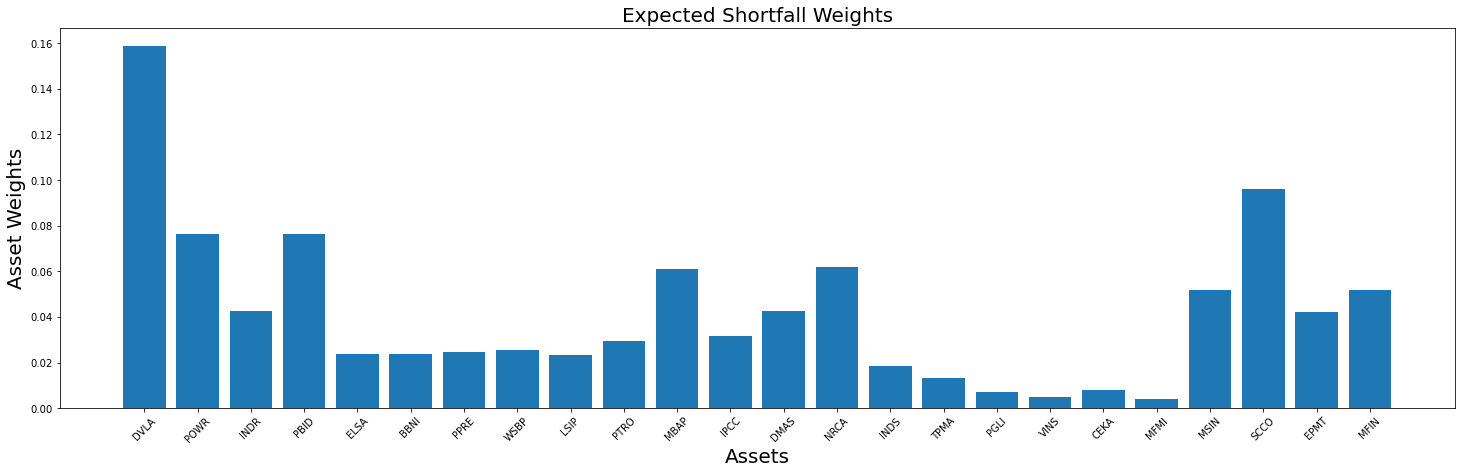

In [22]:
# plotting our optimal portfolio
hercES_weights = hercES.weights
y_pos = np.arange(len(hercES_weights.columns))

plt.figure(figsize=(25,7))
plt.bar(list(hercES_weights.columns), hercES_weights.values[0])
plt.xticks(y_pos, rotation=45, size=10)
plt.xlabel('Assets', size=20)
plt.ylabel('Asset Weights', size=20)
plt.title('Expected Shortfall Weights', size=20)
plt.show()

## Conditional Drawdown at Risk Portfolio
The Conditional Drawdown at Risk (CDaR) of the clusters is used as a risk metric.

In [23]:
# HERC implementation with conditional_drawdown_at_risk solution
hercCDR = HierarchicalEqualRiskContribution()
hercCDR.allocate(asset_names=stock_prices.columns,
                 asset_prices=stock_prices,
                 optimal_num_clusters=10,
                 risk_measure='conditional_drawdown_risk')

print("Conditional Drawdown at Risk Portfolio Weights \n", hercCDR.weights)

Conditional Drawdown at Risk Portfolio Weights 
 level_0      DVLA     POWR      INDR      PBID      ELSA      BBNI      PPRE  \
0        0.112131  0.09178  0.034249  0.073376  0.021062  0.035438  0.020846   

level_0      WSBP      LSIP      PTRO  ...      INDS      TPMA      PGLI  \
0        0.025115  0.023963  0.038265  ...  0.018085  0.014416  0.009394   

level_0      VINS      CEKA      MFMI     MSIN      SCCO      EPMT     MFIN  
0        0.002839  0.003826  0.002584  0.03852  0.108116  0.033906  0.04512  

[1 rows x 24 columns]


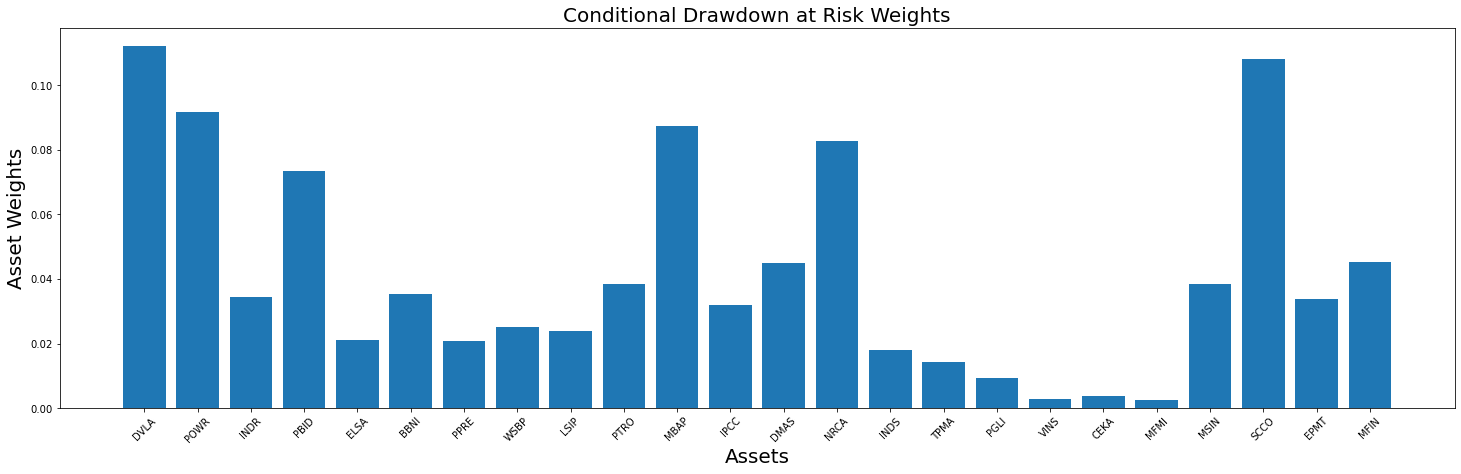

In [24]:
# plotting our optimal portfolio
hercCDR_weights = hercCDR.weights
y_pos = np.arange(len(hercCDR_weights.columns))

plt.figure(figsize=(25,7))
plt.bar(list(hercCDR_weights.columns), hercCDR_weights.values[0])
plt.xticks(y_pos, rotation=45, size=10)
plt.xlabel('Assets', size=20)
plt.ylabel('Asset Weights', size=20)
plt.title('Conditional Drawdown at Risk Weights', size=20)
plt.show()

## Comparison of Risk Measures
In the following graph, we can see how the portfolio weightings differ for each solution.

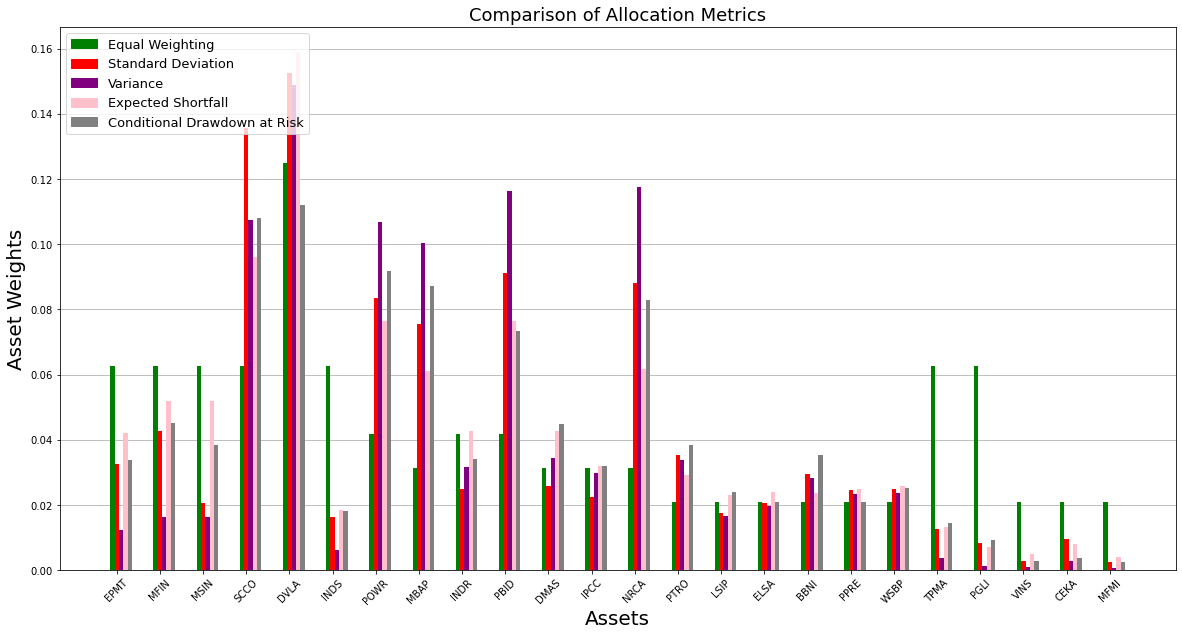

In [31]:
MSD_weights = hercMSD_weights[ward_linkage.columns]
MV_weights = hercMV_weights[ward_linkage.columns]
ES_weights = hercES_weights[ward_linkage.columns]
CDR_weights = hercCDR_weights[ward_linkage.columns]

x = np.arange(len(ward_linkage.columns))
bar_width = 0.1

plt.figure(figsize=(20,10))
plt.bar(x, ward_linkage.values[0], color='green', width=bar_width, zorder=2)
plt.bar(x + bar_width, MSD_weights.values[0], color='red', width=bar_width, zorder=2)
plt.bar(x + bar_width*2, MV_weights.values[0], color='purple', width=bar_width, zorder=2)
plt.bar(x + bar_width*3, ES_weights.values[0], color='pink', width=bar_width, zorder=2)
plt.bar(x + bar_width*4, CDR_weights.values[0], color='grey', width=bar_width, zorder=2)

plt.xticks(x + bar_width, ward_linkage, rotation=45, size=10)
plt.title('Comparison of Allocation Metrics', size=18)
plt.xlabel('Assets', size=20)
plt.ylabel('Asset Weights', size=20)

green_patch = mpatches.Patch(color='green', label='Equal Weighting')
red_patch = mpatches.Patch(color='red', label='Standard Deviation')
purple_patch=mpatches.Patch(color='purple', label='Variance')
pink_patch = mpatches.Patch(color='pink', label='Expected Shortfall')
grey_patch=mpatches.Patch(color='grey', label='Conditional Drawdown at Risk')
plt.legend(handles=[green_patch, red_patch, purple_patch, pink_patch, grey_patch], loc='upper left', prop={'size': 13})

plt.grid(axis='y')
# plt.savefig('Comparison of Allocation Metrics without K-Means Clustering.png')

plt.show()

## __Calculate Returns__

In [26]:
# importing ReturnsEstimation class from MlFinLab
from mlfinlab.portfolio_optimization.returns_estimators import ReturnsEstimators

In [27]:
# calculating our asset returns
returns = ReturnsEstimators.calculate_returns(stock_prices)
returns.head()

level_0,BBNI,CEKA,DMAS,DVLA,ELSA,EPMT,INDR,INDS,IPCC,LSIP,...,NRCA,PBID,PGLI,POWR,PPRE,PTRO,SCCO,TPMA,VINS,WSBP
Date,,,,,,,,,,,,,,,,,,,,,
2018-08-09,-0.018519,0.031579,-0.007936,0.000000,-0.036083,-0.105263,-0.007299,0.042453,0.021807,-0.026923,...,0.015707,-0.004255,0.0,0.010101,-0.004951,-0.040872,0.000000,-0.014085,-0.038760,-0.009662
2018-08-10,0.003145,0.051020,0.192000,0.000000,0.021390,0.000000,-0.014706,-0.031674,0.000000,-0.039526,...,0.010309,0.004274,0.0,-0.015000,-0.009950,-0.008523,0.000000,0.000000,0.024194,0.014634
2018-08-13,-0.072100,-0.038835,-0.013423,-0.005102,-0.062827,0.000000,-0.067164,-0.042056,-0.018293,-0.028807,...,-0.010204,-0.012766,0.0,0.015228,-0.020101,-0.051576,0.005025,-0.042857,-0.007874,-0.048077
2018-08-14,-0.013514,0.020202,-0.088435,0.000000,-0.022346,-0.058824,-0.024000,-0.009756,-0.006211,0.000000,...,-0.020619,0.004310,0.0,0.000000,0.000000,-0.012085,0.000000,-0.067164,0.000000,-0.030303
2018-08-15,0.010274,-0.004950,0.029851,0.000000,0.011429,0.000000,0.008197,0.054187,-0.018750,0.122881,...,0.000000,0.004292,0.0,-0.015000,-0.005128,0.009174,-0.050000,0.040000,-0.047619,0.000000


In [28]:
# calculating our covariance matrix
cov = returns.cov()
cov

level_0,BBNI,CEKA,DMAS,DVLA,ELSA,EPMT,INDR,INDS,IPCC,LSIP,...,NRCA,PBID,PGLI,POWR,PPRE,PTRO,SCCO,TPMA,VINS,WSBP
level_0,,,,,,,,,,,,,,,,,,,,,
BBNI,0.000660,0.000128,0.000268,0.000029,0.000327,-0.000018,0.000242,0.000132,0.000323,0.000352,...,1.237037e-04,0.000165,5.173917e-05,1.532676e-04,0.000329,0.000247,1.425184e-05,0.000011,-0.000049,0.000396
CEKA,0.000128,0.001050,0.000110,0.000031,0.000146,-0.000036,0.000163,0.000070,0.000195,0.000195,...,1.319475e-04,0.000097,1.625872e-04,3.646269e-05,0.000140,0.000135,1.581557e-05,0.000101,0.000257,0.000149
DMAS,0.000268,0.000110,0.001085,0.000073,0.000249,0.000023,0.000132,0.000039,0.000259,0.000230,...,1.575253e-04,0.000047,1.467393e-05,1.078472e-04,0.000229,0.000143,6.845647e-06,0.000074,0.000104,0.000323
DVLA,0.000029,0.000031,0.000073,0.000405,0.000039,-0.000008,0.000008,0.000003,-0.000014,0.000056,...,-1.369903e-05,0.000069,-2.709074e-05,4.818739e-05,0.000061,0.000034,2.852939e-06,0.000022,-0.000063,0.000090
ELSA,0.000327,0.000146,0.000249,0.000039,0.000947,0.000017,0.000267,0.000108,0.000333,0.000394,...,1.561750e-04,0.000100,2.580861e-05,1.342557e-04,0.000392,0.000293,8.948892e-06,0.000031,0.000058,0.000420
EPMT,-0.000018,-0.000036,0.000023,-0.000008,0.000017,0.001015,0.000026,-0.000008,-0.000067,-0.000003,...,-1.934126e-06,-0.000054,2.886517e-05,-4.657310e-05,-0.000043,0.000013,1.617675e-05,-0.000031,0.000013,-0.000061
INDR,0.000242,0.000163,0.000132,0.000008,0.000267,0.000026,0.001391,0.000082,0.000267,0.000242,...,9.054152e-05,0.000196,1.883369e-05,8.974249e-05,0.000314,0.000250,2.585201e-05,-0.000026,-0.000058,0.000235
INDS,0.000132,0.000070,0.000039,0.000003,0.000108,-0.000008,0.000082,0.000776,0.000112,0.000078,...,2.908200e-05,-0.000011,-3.994664e-05,1.434837e-06,0.000079,0.000078,6.291749e-06,0.000054,0.000047,0.000100
IPCC,0.000323,0.000195,0.000259,-0.000014,0.000333,-0.000067,0.000267,0.000112,0.001254,0.000345,...,1.406539e-04,0.000094,-4.243875e-05,6.857349e-05,0.000240,0.000140,-2.068157e-05,-0.000030,0.000090,0.000300


### Conditional Drawdown at Risk Solution

In [29]:
# from here, we can now create our portfolio
hercCDR_custom = HierarchicalEqualRiskContribution()
hercCDR_custom.allocate(asset_names=stock_prices.columns,
                        asset_returns=returns,
                        covariance_matrix=cov,
                        optimal_num_clusters=10,
                        risk_measure='conditional_drawdown_risk')

print("Custom HERC Portfolio - Conditional Drawdown at Risk \n", hercCDR_custom.weights)

Custom HERC Portfolio - Conditional Drawdown at Risk 
 level_0      DVLA     POWR      INDR      PBID      ELSA      BBNI      PPRE  \
0        0.112131  0.09178  0.034249  0.073376  0.021062  0.035438  0.020846   

level_0      WSBP      LSIP      PTRO  ...      INDS      TPMA      PGLI  \
0        0.025115  0.023963  0.038265  ...  0.018085  0.014416  0.009394   

level_0      VINS      CEKA      MFMI     MSIN      SCCO      EPMT     MFIN  
0        0.002839  0.003826  0.002584  0.03852  0.108116  0.033906  0.04512  

[1 rows x 24 columns]


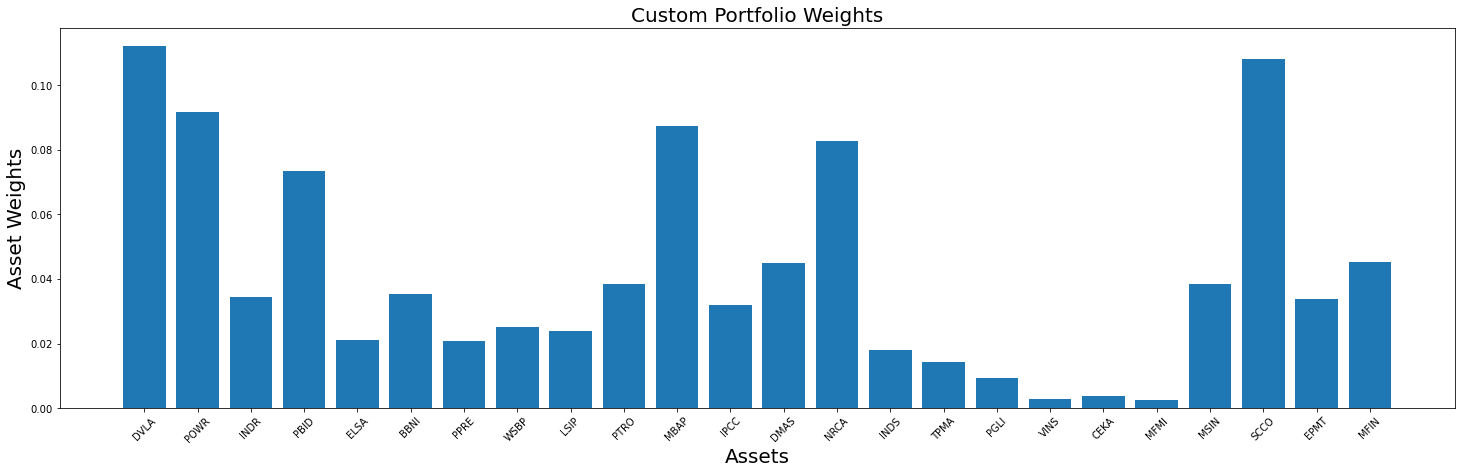

In [30]:
# plotting our optimal portfolio
customCDR_weights = hercCDR_custom.weights
y_pos = np.arange(len(customCDR_weights.columns))

plt.figure(figsize=(25,7))
plt.bar(list(customCDR_weights.columns), customCDR_weights.values[0])
plt.xticks(y_pos, rotation=45, size=10)
plt.xlabel('Assets', size=20)
plt.ylabel('Asset Weights', size=20)
plt.title('Custom Portfolio Weights', size=20)
plt.show()